# 데이터 과학 (15주차) 6월13일
> 함수형모델 공부

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [함수형모댈]

### 강의영상

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-zHWBdwMLc0v7XeGagFoIqB

### 함수형모델 

`-` Imports

In [2]:
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp
import matplotlib.pyplot as plt 

In [3]:
tnp.experimental_enable_numpy_behavior()

`-` data

In [4]:
x= tnp.linspace(0,1,100).reshape(100,1)
y= x + tf.random.normal([100,1])*0.1

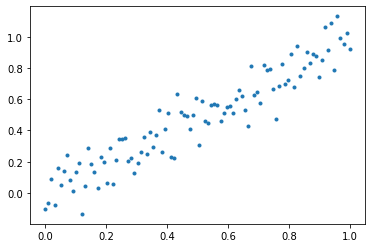

In [ ]:
plt.plot(x,y,'.')

`-` input layer

In [ ]:
x0= tf.keras.layers.Input(shape=(1,))

`-` 아키텍처

In [ ]:
l1=tf.keras.layers.Dense(30)
a1=tf.keras.layers.Activation(tf.nn.relu)

In [ ]:
x1=a1(l1(x0))

In [ ]:
l2=tf.keras.layers.Dense(30)
a2=tf.keras.layers.Activation(tf.nn.relu)

In [ ]:
x2=a2(l2(x1))

In [ ]:
l3=tf.keras.layers.Dense(1)
x3=l3(x2) # output

`-` input, output 으로 모델(net)설정

In [ ]:
net = tf.keras.Model(inputs=x0, outputs=x3)

In [ ]:
net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 30)                60        
                                                                 
 activation_1 (Activation)   (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 activation_2 (Activation)   (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,021
Trainable params: 1,021
Non-trainable par

`-` compile and fit

In [ ]:
net.compile(loss='mse', optimizer='sgd')

In [ ]:
net.fit(x,y,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 982us/step - loss: 0.0457
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 3/100
4/4 [==============================] - 0s 921us/step - loss: 0.0440
Epoch 4/100
4/4 [==============================] - 0s 837us/step - loss: 0.0432
Epoch 5/100
4/4 [==============================] - 0s 778us/step - loss: 0.0423
Epoch 6/100
4/4 [==============================] - 0s 796us/step - loss: 0.0413
Epoch 7/100
4/4 [==============================] - 0s 785us/step - loss: 0.0405
Epoch 8/100
4/4 [==============================] - 0s 805us/step - loss: 0.0395
Epoch 9/100
4/4 [==============================] - 0s 815us/step - loss: 0.0388
Epoch 10/100
4/4 [==============================] - 0s 791us/step - loss: 0.0380
Epoch 11/100
4/4 [==============================] - 0s 864us/step - loss: 0.0372
Epoch 12/100
4/4 [==============================] - 0s 828us/step - loss: 0.0363
Epoch 13/100
4/4 [=====================

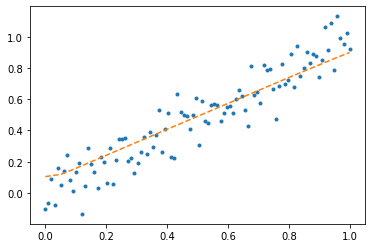

In [ ]:
plt.plot(x,y,'.')
plt.plot(x,net(x),'--')